In [1]:
# NASA Patent Data Analysis
In this personal project, I explored a rich dataset of NASA patents, analyzing key attributes like Application SN, Case Number, Patent Expiration Date, Patent Number, Status, and Title. My objective was to investigate trends and patterns that could shed light on NASA’s innovation landscape, giving a glimpse into their areas of technological advancement. Without a specific hypothesis, I conducted an open-ended analysis, aiming to extract as much knowledge as possible from the data. This approach enabled me to identify areas where NASA’s innovations have evolved over time and to understand the statuses and lifespans of various patents in detail.
 

# This notebook presents an analysis of NASA's patent data. The analysis covers the following sections:

#     Data Cleaning and Preparation
#     Exploratory Data Analysis (EDA)
#     Visualizations
#     Summary and Insights



In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [3]:
import os 
print(os.getcwd())
pd.options.mode.copy_on_write = True 

C:\WINDOWS\system32


In [4]:
#fetching NASA Data using API
def fetch_nasa_data(api_endpoint):
    try:
        # Send a GET request to the API endpoint
        response = requests.get(api_endpoint)
        response.raise_for_status()
        # Parse the response data (assuming JSON)
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None
# Define the API endpoint for NASA data
api_endpoint = "https://data.nasa.gov/resource/gquh-watm.json"
data = fetch_nasa_data(api_endpoint)


In [5]:
#creating a DataFrame
df=pd.DataFrame(data)

In [6]:
df.head(5)

,center,status,case_number,patent_number,application_sn,title,patent_expiration_date
0,NASA Kennedy Space Center,Application,KSC-12871,0,"13/033,085",Polyimide Wire Insulation Repair System,NaN
1,NASA Ames Research Center,Issued,ARC-14048-1,5694939,"08/543,093",Autogenic-Feedback Training Exercise Method & ...,2015-10-03T00:00:00.000
2,NASA Ames Research Center,Issued,ARC-14231-1,6109270,"09/017,519",Multimodality Instrument For Tissue Characteri...,2017-02-04T00:00:00.000
3,NASA Ames Research Center,Issued,ARC-14231-2DIV,6976013,"10/874,003",Metrics For Body Sensing System,2024-06-16T00:00:00.000
4,NASA Ames Research Center,Issued,ARC-14231-3,6718196,"09/652,299",Multimodality Instrument For Tissue Characteri...,2017-02-04T00:00:00.000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   center                  1000 non-null   object
 1   status                  1000 non-null   object
 2   case_number             1000 non-null   object
 3   patent_number           776 non-null    object
 4   application_sn          998 non-null    object
 5   title                   1000 non-null   object
 6   patent_expiration_date  729 non-null    object
dtypes: object(7)
memory usage: 54.8+ KB


In [8]:
# deleting duplicates 
df.duplicated().sum()

0

In [9]:
# dropping column patient expiration date 
df = df.drop(['patent_expiration_date','patent_number'], axis=1)

In [10]:
# removing those two rows where where do not have application_sn

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   center          1000 non-null   object
 1   status          1000 non-null   object
 2   case_number     1000 non-null   object
 3   application_sn  998 non-null    object
 4   title           1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [11]:
df1=df.dropna()

In [12]:
#Now our dataset has no duplicates and no missing values
df1.head()
df1[['status','center','title']]=df[['status','center','title']].astype('str')
df1.columns

Index(['center', 'status', 'case_number', 'application_sn', 'title'], dtype='object')

In [13]:
# Categorizing patents by creating a new column Patent_Category

In [14]:
def categorize_title(title):
    title=title.lower()
    if 'aerogel' in title or 'nanoparticles' in title or 'superalloy' in title or 'inventory' in title:
        return 'Materials'
    elif 'gps' in title:
        return 'Navigation'
    elif 'memory' in title or 'actuator' in title:
        return 'Mechanics'
    elif 'semiconductors' in title:
        return 'Semiconductors'
    elif 'rocket' in title or 'sensor' in title or   'nanosensors' in title or 'igniter' in title:
        return 'Sensors'
    elif 'coatings' in title or 'syntheis' in title or 'cathode' in title or 'polyimdes' in title or  'control-rods' in title  or 'oxide' in title or  'iridium' in title or 'ph' in title or  'polymeric' in title or 'halon' in title or  'waste drying' in title or  'oxygen' in title or 'purify' in title or 'molecule' in title or 'ion' in title or 'temperature' in title  or 'crystal' in title or 'polyimide' in title or 'carbon' in title or 'wire' in title or 'hydrocarbon' in title or 'deposit' in title or'composite' in title:
        return 'Chemistry'
    elif 'Health' in title or 'metabolic' in title or  'autopoiesis' in title or  	 'genetics' in title or 'autogenic' in title or 'cellulose' in title  or 'immune' in title or 'autogenic' in title  or 'immumne' in title or 'weather' in title or 'biotechnology' in title or'speech' in title or 'noise' in title or 'auditory' in title or'pharmaceuticals' in title or 'medical devices' in title or  'genetics' in title or 'microbiology' in title or 'body' in title  or 'tissue' in title or 'sensing' in title or 'bio' in title or 'plasma' in title:
        return 'Biology'
    elif 'ultrasonic' in title or 'wavelength' in title or 'launch adapter system' in title or  'balance' in title or 'bearing' in title or 'detector' in title or 'bandwidth' in title or 'tire' in title or  'stress' in title or  'cooling systems' in title or 'solar' in title or 'fuel' in title  or 'hovercraft' in title or  'magnet' in title or 'electronic' in title or 'image' in title  or 'phase' in title or 'thermocouple' in title  or'thrust' in title or 'multiplexing' in title  or 'locking' in title or 'impedence' in title or 'amplitude' in title  or 'welding' in title or 'antenna' in title or 'battery' in title or 'charge' in title or 'bearings' in title or'conductivity' in title or  'gear' in title or  'ohmic' in title or  'planetarium' in title or 'power' in title or 'Sunphotometer' in title  or 'generator' in title  or 'paired threaded film' in title or 'planar' in title or 'foil bearing' in title or 'engine' in title or 'circuit' in title or 'resistance' in title or 'shock' in title or  'light' in title  or'quantum' in title or'efficiency' in title or 'light' in title or 'trajectory' in title or 'aircraft' in title or 'spatial' in title or 'regulator' in title or 'engine' in title or 'flywheel'in title or'alternator' in title or 'sensing' in title or 'aerodynamic' in title:
        return 'Physics'
    elif 'finance' in title:
        return 'Finance'
    elif 'aerospace' in title:
        return 'Finance'
    elif 'nanotechnology' in title:
        return 'Finance'
    elif 'finance' in title:
        return 'Finance'
    elif 'finance' in title:
        return 'Finance'
    elif 'geometry' in title or 'triangle' in title or 'radius' in title:
        return 'Mathematics'
    elif 'software' in title or 'real time' in title or '3-d' in title or  'project management' in title  or 'neural' in title or 'information' in title or  'display' in title or 'ram' in title or 'neuron' in title or 'laser' in title or 'bit'in title or 'keyboard' in title or 'simulation' in title:
        
        return 'Technology'
    elif 'space' in title or 'flextures' in title or 'ablators' in title :
        
        return 'Aerospace'
    elif 'atm'  in title:
        
        return 'Air Traffic Management'
    elif 'xml'  in title or 'database' in title:
        
        return 'Databases'
    else:
        return 'Other'

# Apply the categorization function to the Title column
df1['Patent_Category'] = df1['title'].apply(categorize_title)


In [15]:
df1['Patent_Category'].value_counts()

Patent_Category
Chemistry         574
Physics           141
Other             102
Sensors            78
Technology         32
Biology            24
Mechanics          21
Materials          11
Aerospace           8
Navigation          3
Databases           1
Finance             1
Mathematics         1
Semiconductors      1
Name: count, dtype: int64

In [16]:
Grouped1 = df1[df1['status'] == 'Issued'].groupby('center').count()

df2=pd.DataFrame(Grouped1)
df2.reset_index(inplace=True)
df2=df2[['center','status']]

In [17]:
df2.columns

Index(['center', 'status'], dtype='object')

In [18]:
#plotting patents by Category

dfx=df1['Patent_Category'].value_counts()
dfxx=pd.DataFrame(dfx)
dfxx

,count
Patent_Category,
Chemistry,574
Physics,141
Other,102
Sensors,78
Technology,32
Biology,24
Mechanics,21
Materials,11
Aerospace,8


Text(0.5, 1.0, 'Patent Categories')

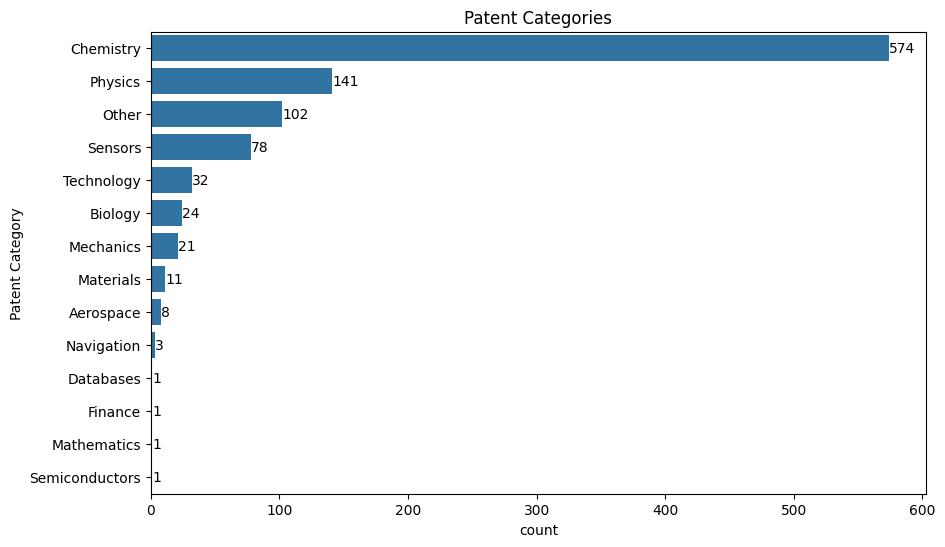

In [19]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=dfxx, x='count', y='Patent_Category',orient='h')
ax.bar_label(ax.containers[0])
# Set x and y labels
plt.xlabel('count')  # X-axis label
plt.ylabel('Patent Category')      # Y-axis label

# Set title for the chart
plt.title('Patent Categories')



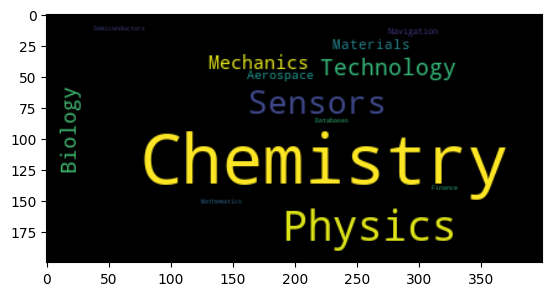

In [20]:

'''Which technologies or inventions are most common based on Patent_Categories?

Analysis: Use word frequency analysis on the Patent_Category column to find the most commonly patented technologies.

Visualizations: Word cloud  of the most common words.'''
import wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(df1['Patent_Category']))
plt.imshow(wordcloud, interpolation='bilinear')

In [21]:
pending_pt = df1[df1['status'] == 'Application'].groupby('center').size().reset_index(name='Pending_Patents_Count')
dt1=pd.DataFrame(pending_pt)
Issued_pt = df1[df1['status'] == 'Issued'].groupby('center').size().reset_index(name='Issued_Patents_Count')
dt2=pd.DataFrame(Issued_pt)
print(dt2)
merged_df = pd.merge(dt1, dt2, on='center', how='inner', suffixes=('_dt1', '_dt2'))
merged_df


                                  center  Issued_Patents_Count
0              NASA Ames Research Center                   100
1  NASA Armstrong Flight Research Center                    12
2             NASA Glenn Research Center                   107
3       NASA Goddard Space Flight Center                   129
4                      NASA Headquarters                     1
5              NASA Kennedy Space Center                    58
6           NASA Langley Research Center                   239


,center,Pending_Patents_Count,Issued_Patents_Count
0,NASA Ames Research Center,38,100
1,NASA Armstrong Flight Research Center,9,12
2,NASA Glenn Research Center,101,107
3,NASA Goddard Space Flight Center,64,129
4,NASA Kennedy Space Center,29,58
5,NASA Langley Research Center,110,239


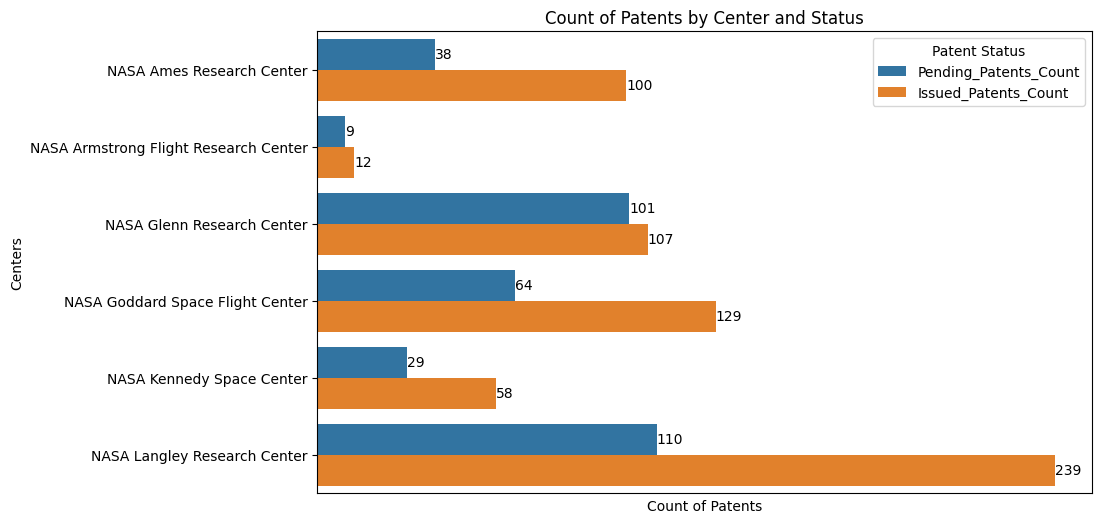

In [22]:
#Analyzing  NASA Center and their  status to understand which centers are producing more successful patents.

df_melted = merged_df.melt(id_vars='center', value_vars=['Pending_Patents_Count', 'Issued_Patents_Count'], 
                    var_name='status', value_name='count')

# Create the bar chart with hue
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=df_melted, x='count', y='center', hue='status')

# Customize the plot
plt.title("Count of Patents by Center and Status")
plt.xlabel("Count of Patents")
plt.ylabel("Centers")
plt.xticks(rotation=75)  # Rotate x labels for better readability
plt.legend(title='Patent Status')
plt.xticks([])

for container in ax.containers:
    ax.bar_label(container)

In [32]:
df_status=df1['status'].value_counts()
df_status=pd.DataFrame(df_status)
df_status.reset_index(inplace=True)
df_status

,status,count
0,Issued,646
1,Application,352


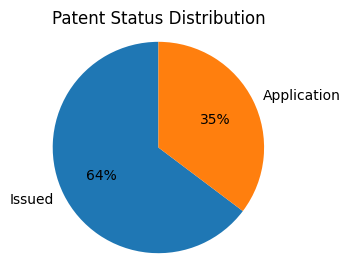

In [33]:
#Patents Status
plt.figure(figsize=(3, 3))  # Optional: set figure size
plt.pie(df_status['count'],labels=df_status['status'],autopct='%1d%%', startangle=90, colors=['#1f77b4', '#ff7f0e', '#d62728'])

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set title for the pie chart
plt.title('Patent Status Distribution')

# Show the plot
plt.show()

Summary

1.Collected Patents Data from NASA website using API. 
2.Analyzed the different columns in the data .
3.Deleted rows which had missing values. 
4.Categorized the different patents into 14 different categories. 
5.Plotted a bar chart to find the most common patent categories. 
6.Created a Word cloud  of the most common words  on the Patent_Category column to find the most commonly patented technologies . 
7.Analyzing  NASA Center and their  status to understand which centers are producing more successful patents. 





Insights

1. Categorizing patents in different categories on the baisis of their their titles. 
2. Visualizing Patent Categories with Worlcloud revealed that mostly patents belong to chemistry branch closely followd by physics .
3. NASA Langley Research Center is the top most inventor with record of  maximum patents issued.
4. Out of total ,64.7% Patents have been issued till now and 35% are in the process of being issued.
  





